In [1]:
#We are going to analyse for features such as multiplicative seasonality,non-daily data and outliers which were previously absent in the sales data
!pip install prophet

In [3]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [5]:
df.columns = ['y']
df['ds'] = df.index

In [6]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/e044kolh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/flwicb29.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64411', 'data', 'file=/tmp/tmptsljqja7/e044kolh.json', 'init=/tmp/tmptsljqja7/flwicb29.json', 'output', 'file=/tmp/tmptsljqja7/prophet_modely1yuqjx7/prophet_model-20230918101428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:14:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

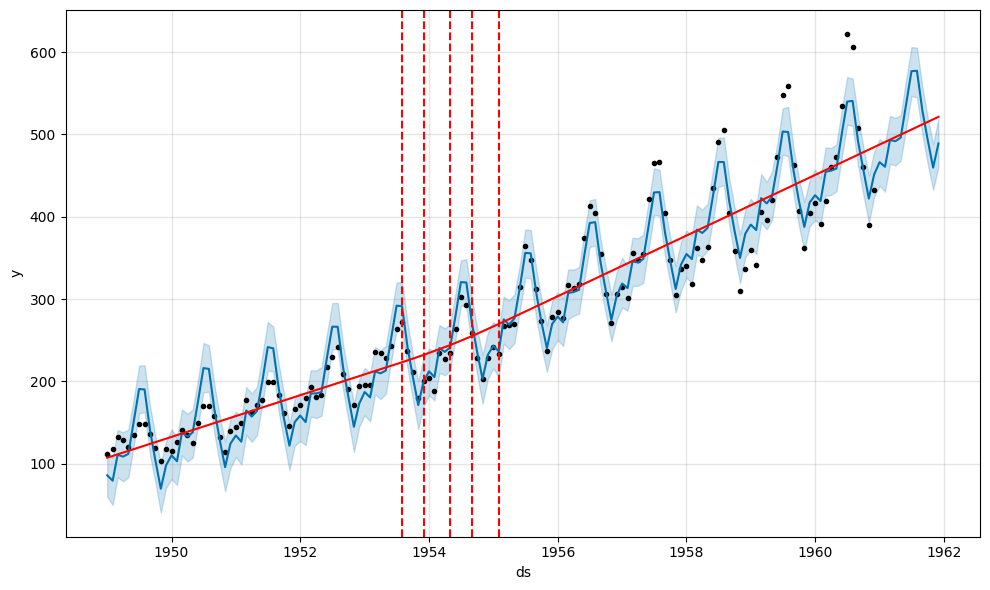

In [8]:
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

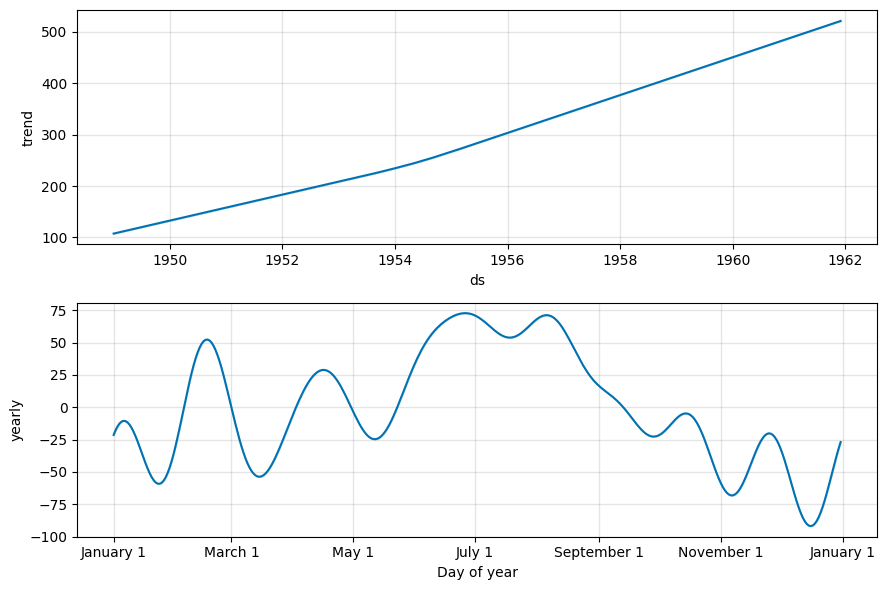

In [9]:
m.plot_components(forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/x0t9w1ed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/wp977e3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82090', 'data', 'file=/tmp/tmptsljqja7/x0t9w1ed.json', 'init=/tmp/tmptsljqja7/wp977e3y.json', 'output', 'file=/tmp/tmptsljqja7/prophet_modelnewrgfb0/prophet_model-20230918101642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:16:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:16:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


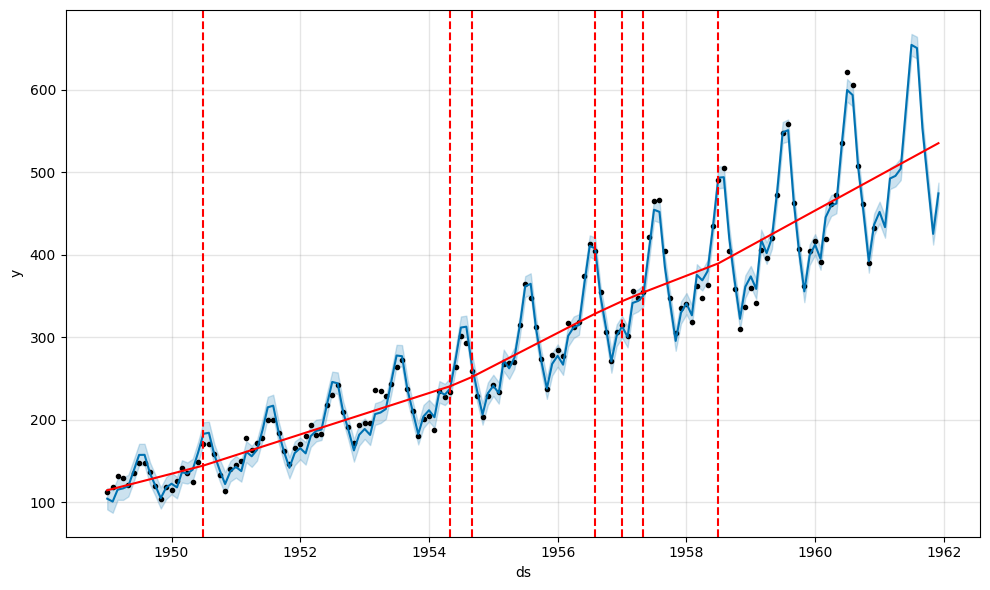

In [10]:
m2 = Prophet(seasonality_mode='multiplicative')
m2.fit(df)
future = m2.make_future_dataframe(periods=12, freq='MS')
forecast = m2.predict(future)
fig = m2.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

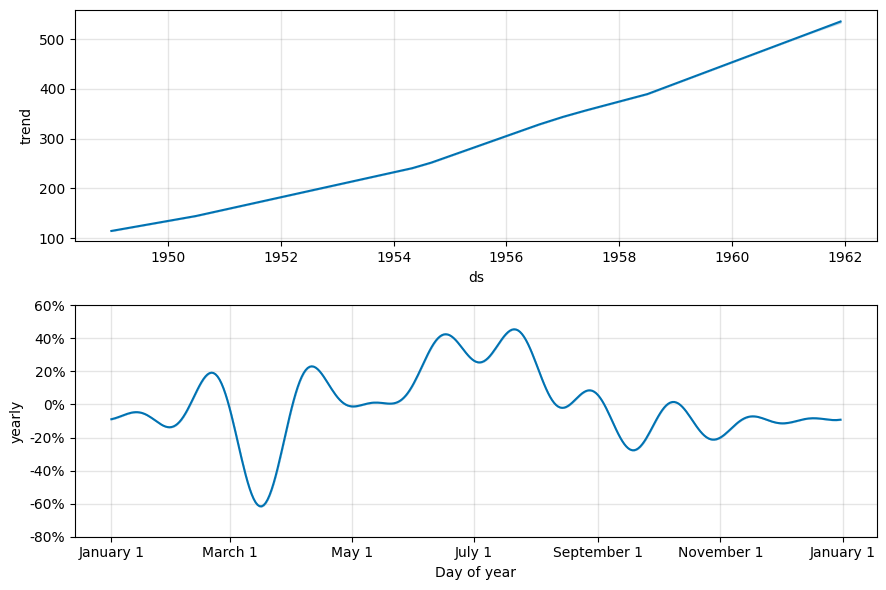

In [11]:
m2.plot_components(forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/7mf52qq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/p1gmwt4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17047', 'data', 'file=/tmp/tmptsljqja7/7mf52qq5.json', 'init=/tmp/tmptsljqja7/p1gmwt4b.json', 'output', 'file=/tmp/tmptsljqja7/prophet_modelwvkml0v_/prophet_model-20230918101829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


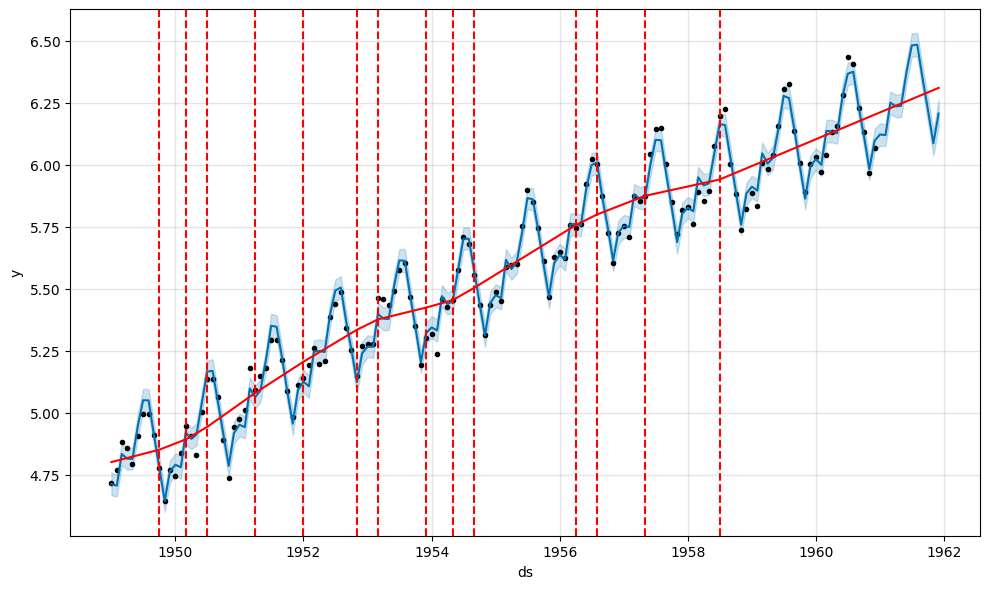

In [12]:
logdf = df.copy()
logdf['y'] = np.log(logdf['y'])
m3 = Prophet()
m3.fit(logdf)
future = m3.make_future_dataframe(periods=12, freq='MS')
forecast = m3.predict(future)
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

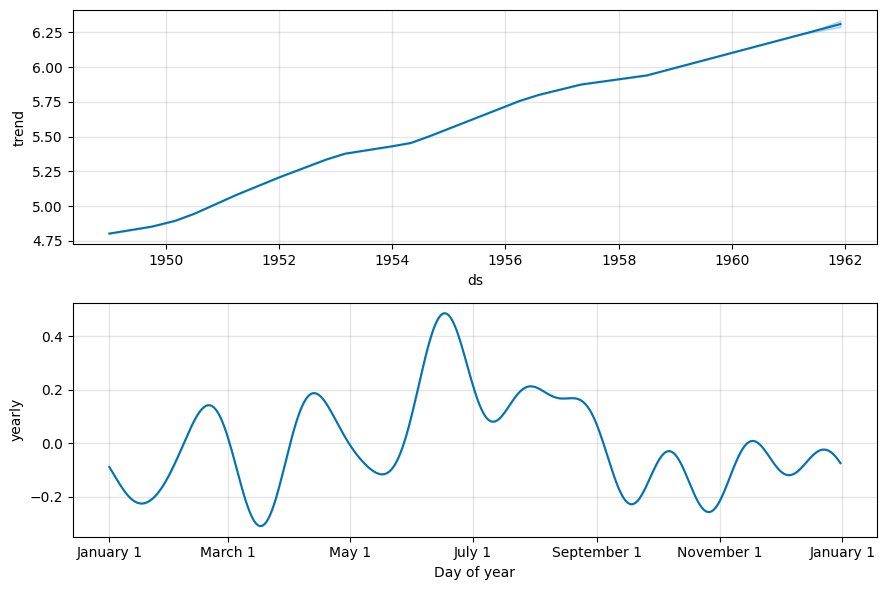

In [13]:
m3.plot_components(forecast);

### OUTLIERS

In [14]:
df.loc['1955-01-01', 'y'] = 600
df.loc['1957-06-01', 'y'] = 1

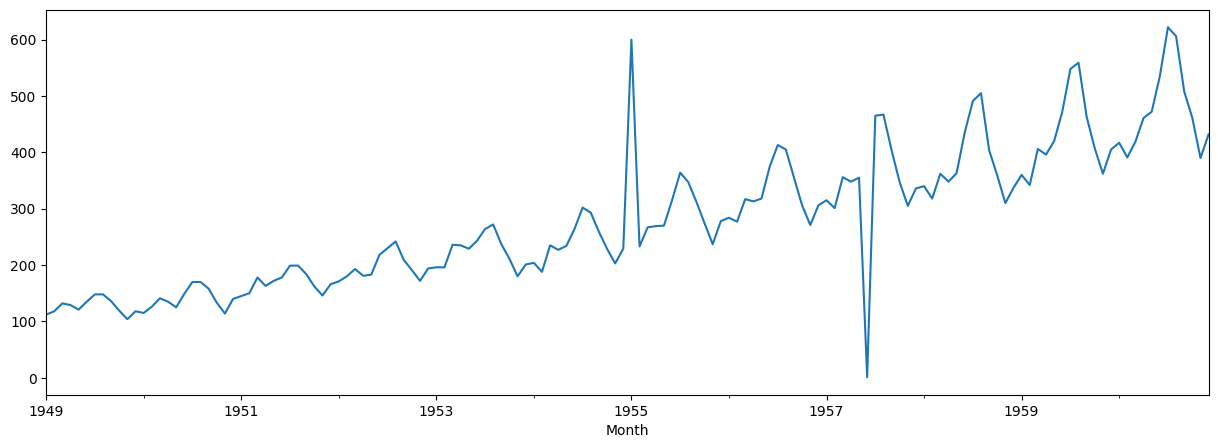

In [15]:
df['y'].plot(figsize=(15, 5));

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/bh0z4cay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/0qx1yopm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36886', 'data', 'file=/tmp/tmptsljqja7/bh0z4cay.json', 'init=/tmp/tmptsljqja7/0qx1yopm.json', 'output', 'file=/tmp/tmptsljqja7/prophet_modeljfizbp_5/prophet_model-20230918102057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:20:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


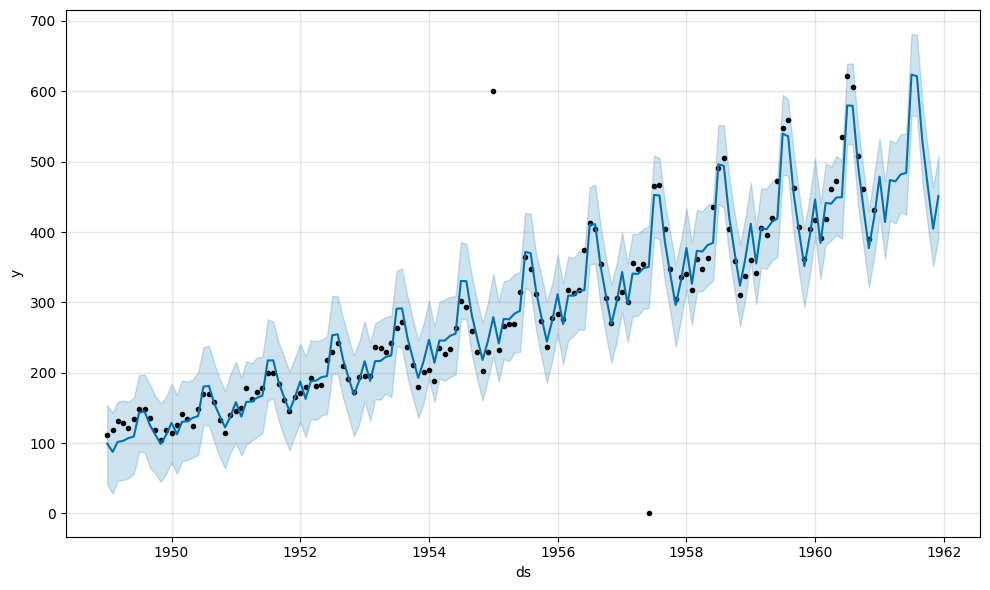

In [16]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
m.plot(forecast);

In [17]:
#Notice an increase in the prediction intervals making the model less confident in its prediction
#Since the model is continuous and missing values are taken as 0, we simply remove the outliers
df2 = df[~df.index.isin(['1955-01-01', '1957-06-01'])]

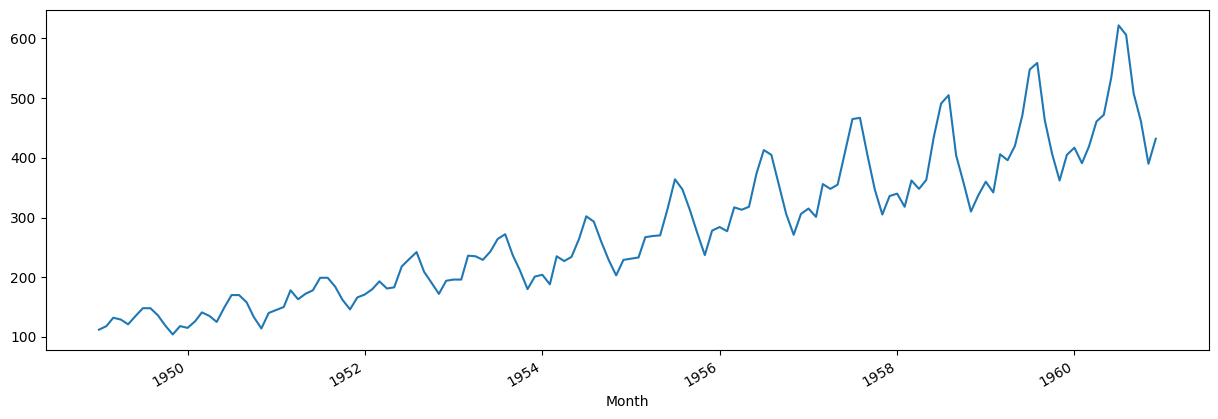

In [18]:
df2['y'].plot(figsize=(15, 5));

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/bhoj7zcc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsljqja7/552w4870.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64088', 'data', 'file=/tmp/tmptsljqja7/bhoj7zcc.json', 'init=/tmp/tmptsljqja7/552w4870.json', 'output', 'file=/tmp/tmptsljqja7/prophet_model9hr4ez1g/prophet_model-20230918102402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


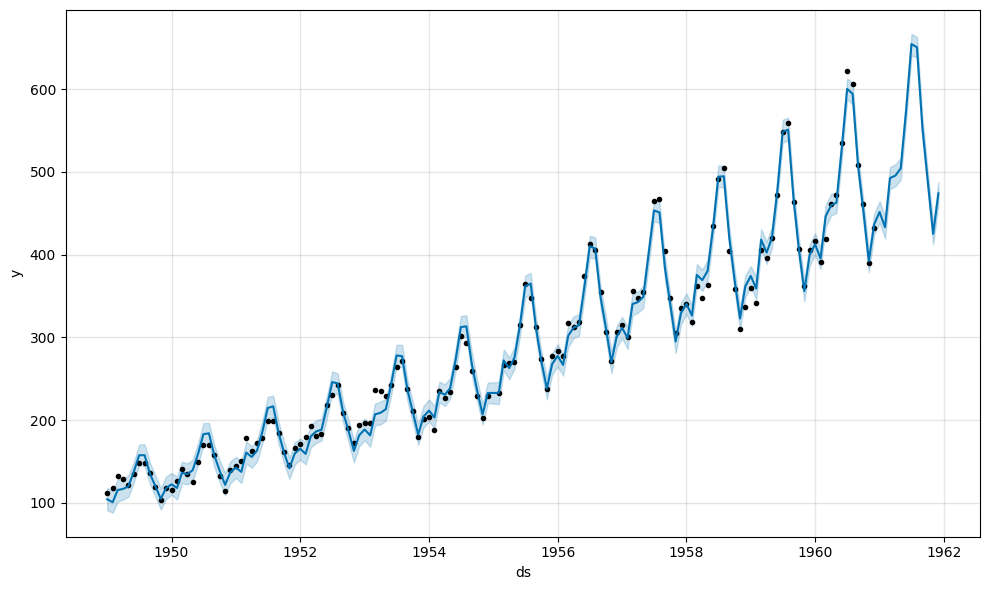

In [19]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df2)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
m.plot(forecast);

The prediciton intervals are again small since there is no need to account for large intervals